In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import pos_tag, pos_tag_sents

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import pandas as pd

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Download necessary NLTK data
# nltk.download('punkt', quiet=True)
# nltk.download('averaged_perceptron_tagger', quiet=True)
# nltk.download('wordnet', quiet=True)
# nltk.download('stopwords', quiet=True)
# nltk.download('sentiwordnet', quiet=True)

In [2]:
df = pd.read_csv(r'E:\dbda khargar\Final Project\restaurent_df.csv')

In [3]:
df = df[['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state']]

In [4]:
df = df[df['is_open']!=0]

In [9]:
df.shape

(54290, 12)

In [11]:
df.dropna(subset=['address'],inplace=True)

In [13]:
df.dropna(subset=['postal_code'],inplace=True)

In [15]:
counts = df['review_count'].value_counts()

In [17]:
df['categories'].value_counts()

categories
Restaurants, Pizza                                                                   666
Pizza, Restaurants                                                                   574
Restaurants, Chinese                                                                 537
Chinese, Restaurants                                                                 513
Restaurants, Mexican                                                                 447
                                                                                    ... 
Food, Party & Event Planning, Farmers Market, Event Planning & Services                1
Bars, Cocktail Bars, Tacos, Mexican, Restaurants, Cajun/Creole, Nightlife              1
Restaurants, Italian, Mediterranean                                                    1
Seafood, Party & Event Planning, Event Planning & Services, Restaurants, Mexican       1
Restaurants, Comfort Food, Food, Food Trucks, Caterers, Event Planning & Services      1
Name: coun

In [19]:
above1000 = counts.nlargest(17).index

In [21]:
df = df[df['review_count'].isin(above1000)]

In [23]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

In [25]:
df['name'].value_counts().nlargest(16)

name
Subway                   369
Dunkin'                  356
McDonald's               343
Walgreens                290
CVS Pharmacy             286
Starbucks                269
Wawa                     253
Burger King              243
Wendy's                  221
Taco Bell                194
Domino's Pizza           184
Enterprise Rent-A-Car    156
Papa John's Pizza        147
Pizza Hut                139
KFC                      114
Arby's                   103
Name: count, dtype: int64

In [27]:
df_f = df[~df['name'].str.contains('CVS Pharmacy')]

In [29]:
df_f = df_f[~df_f['name'].str.contains('Enterprise Rent-A-Car')]

In [31]:
df_f = df_f[~df_f['name'].str.contains('Walgreens')]

In [33]:
df_f['name'].value_counts().nlargest(15)

name
Subway               369
Dunkin'              356
McDonald's           343
Starbucks            269
Wawa                 253
Burger King          243
Wendy's              221
Taco Bell            194
Domino's Pizza       184
Papa John's Pizza    147
Pizza Hut            139
KFC                  114
Arby's               103
7-Eleven              95
ALDI                  80
Name: count, dtype: int64

In [35]:
top15=df_f['name'].value_counts().nlargest(15).index

In [37]:
df = df_f[df_f['name'].isin(top15)]

In [39]:
df.shape

(3110, 12)

In [41]:
df['stars'].value_counts()

stars
2.0    783
2.5    658
1.5    495
3.0    469
3.5    357
4.0    171
1.0    104
4.5     63
5.0     10
Name: count, dtype: int64

In [43]:
dfr = pd.read_csv(r'E:\dbda khargar\Final Project\yelp_dataset\csv\yelp_academic_dataset_review.csv',on_bad_lines='skip')

C:\Users\dheem\AppData\Local\Temp\ipykernel_9900\3785097251.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfr = pd.read_csv(r'E:\dbda khargar\Final Project\yelp_dataset\csv\yelp_academic_dataset_review.csv',on_bad_lines='skip')


In [44]:
dfr.dropna(subset=['user_id'],inplace=True)
dfr.dropna(subset=['useful'],inplace=True)
dfr.dropna(subset=['review_id'],inplace=True)
dfr.dropna(subset=['date'],inplace=True)
dfr.dropna(subset=['stars'],inplace=True)
dfr.dropna(subset=['text'],inplace=True)
dfr.dropna(subset=['funny'],inplace=True)
dfr.dropna(subset=['business_id'],inplace=True)
dfr.dropna(subset=['cool'],inplace=True)

In [45]:
dfr.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

In [49]:
def downsize_review(review, business1):
    temp = business1['business_id'].tolist()
    review1 = review[review['business_id'].isin(temp)]
    review1 = review1[['business_id','review_id','user_id', 'stars', 'text']]
    review2 = review1.reset_index(drop=True)
    return review2

dfr = downsize_review(dfr, df)
dfr.shape

(35839, 5)

In [51]:
dfrb = pd.merge(df, dfr, on='business_id', how='left')

In [53]:
dfrb.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'stars_x', 'state',
       'review_id', 'user_id', 'stars_y', 'text'],
      dtype='object')

In [55]:
dfrb.rename(columns = {'stars_x':'business_ratings','stars_y':'user_ratings','date':'review_date'},inplace=True)

In [57]:
dfrb.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count', 'business_ratings',
       'state', 'review_id', 'user_id', 'user_ratings', 'text'],
      dtype='object')

In [59]:
dfrb['name'].value_counts()

name
McDonald's           4677
Dunkin'              4006
Subway               3119
Starbucks            3062
Burger King          2924
Wendy's              2903
Taco Bell            2694
Wawa                 2581
Domino's Pizza       2336
Papa John's Pizza    1767
Pizza Hut            1696
KFC                  1331
Arby's               1139
ALDI                  859
7-Eleven              745
Name: count, dtype: int64

In [61]:
dfrb = dfrb.drop('is_open',axis=1)

In [63]:
dfrb.shape

(35839, 15)

In [65]:
dfrb = dfrb.drop('categories',axis=1)

In [67]:
dfrb.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,Nd9IlLVwTdG0JEFYnA4cJw,_GZUfylSfVj2gNOkiqsSoQ,1.0,Undercook and overpaid! Got a pizza and it was...
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,gn8_q0-x36PvNli6Rc_Upw,"apologized and gave us the \""oops\"" at no cha...",5.0,We always have great service here. Only once i...
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,5ekFz7qmWJNxT6uvM3HBBg,oRQRl1Dw6OZrVwi4y0K9Kg,4.0,Dominoes is getting better lately about gettin...
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,wrQ7t43gqQ4kIcWyuZYKpw,5BpQb0e4i9gw0HUjOpYUYA,5.0,Great pizzas and great service. Love the orde...
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,MVEKSpJkjogSNRSbJ-0r7w,IN9v5sjMnlDfq2pid3pwBw,2.0,"Ordered online, quoted 26-36 min, delivered al..."


In [69]:
dfc = pd.read_csv(r'E:\dbda khargar\Final Project\yelp_dataset\csv\yelp_academic_dataset_checkin.csv',on_bad_lines='skip')

In [71]:
def downsize_checkin(checkin, business1):
    temp = business1['business_id'].tolist()
    checkin1 = checkin[checkin['business_id'].isin(temp)]
    checkin2 = checkin1.groupby('business_id').sum().reset_index()
    return checkin2

dfc = downsize_checkin(dfc, dfrb)
dfc.head()
dfc.shape

(3063, 2)

In [73]:
dfc['checkins'] = dfc['date'].apply(lambda x: len(x.strip(', ').split(', ')) if x.strip(', ') else 0)

In [75]:
dfc = dfc.drop('date',axis=1)

In [77]:
len(dfc[dfc['checkins'] < 1]) 

0

In [79]:
dfrbc = pd.merge(dfrb,dfc,how='left',on='business_id')

In [81]:
dfrbc.shape

(35839, 15)

In [83]:
dfrbc.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'user_ratings', 'text', 'checkins'],
      dtype='object')

In [85]:
dfrbc.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text,checkins
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,Nd9IlLVwTdG0JEFYnA4cJw,_GZUfylSfVj2gNOkiqsSoQ,1.0,Undercook and overpaid! Got a pizza and it was...,1.0
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,gn8_q0-x36PvNli6Rc_Upw,"apologized and gave us the \""oops\"" at no cha...",5.0,We always have great service here. Only once i...,1.0
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,5ekFz7qmWJNxT6uvM3HBBg,oRQRl1Dw6OZrVwi4y0K9Kg,4.0,Dominoes is getting better lately about gettin...,1.0
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,wrQ7t43gqQ4kIcWyuZYKpw,5BpQb0e4i9gw0HUjOpYUYA,5.0,Great pizzas and great service. Love the orde...,1.0
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,MVEKSpJkjogSNRSbJ-0r7w,IN9v5sjMnlDfq2pid3pwBw,2.0,"Ordered online, quoted 26-36 min, delivered al...",1.0


In [87]:
dft = pd.read_csv(r'E:\dbda khargar\Final Project\yelp_dataset\csv\yelp_academic_dataset_tip.csv',on_bad_lines='skip')

In [88]:
dft.columns

Index(['business_id', 'compliment_count', 'date', 'text', 'user_id'], dtype='object')

In [89]:
def downsize_tip(tip, business1):
    temp = business1['business_id'].tolist()
    tip1 = tip[tip['business_id'].isin(temp)]
    tip1 = tip1[['business_id','text']]
    tip2 = tip1.reset_index(drop=True)
    return tip2
    
dft = downsize_tip(dft, dfrbc)
dft.shape

(6747, 2)

In [93]:
class CleaningPipeline:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def remove_non_ascii(self, text):
        return ''.join(char for char in text if ord(char) < 128)

    def remove_whitespace_and_special_chars(self, text):
        return re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', text)).strip()

    def remove_numerics(self, text):
        return re.sub(r'\d+', '', text)

    def remove_stop_words(self, text):
        return ' '.join(word for word in text.split() if word.lower() not in self.stop_words)

    def word_lemmatization(self, text):
        return ' '.join(self.lemmatizer.lemmatize(word) for word in text.split())

    def clean_text(self, text):
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'<[^>]+>', '', text)
        text = text.lower()
        text = re.sub(r'\W', ' ', text)
        return text

    def convert_tag(self, tag):
        tag_dict = {'N': 'n', 'J': 'a', 'R': 'r', 'V': 'v'}
        try:
            return tag_dict[tag[0]]
        except KeyError:
            return None

    def compute_sentiment_score(self, text):
        sentiment_score = 0
        tokens_count = 0

        cleaned_text = self.clean_text(text)
        sentences = sent_tokenize(cleaned_text)

        for sentence in sentences:
            tagged_words = nltk.pos_tag(word_tokenize(sentence))

            for word, tag in tagged_words:
                wn_tag = self.convert_tag(tag)
                if wn_tag not in ('n', 'a', 'r', 'v'):
                    continue

                lemma = self.lemmatizer.lemmatize(word, pos=wn_tag)
                if not lemma:
                    continue

                synsets = wn.synsets(lemma, pos=wn_tag)
                if not synsets:
                    continue

                swn_synset = swn.senti_synset(synsets[0].name())
                sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
                tokens_count += 1

        if tokens_count == 0:
            return 0

        final_score = sentiment_score / tokens_count

        if final_score > 0:
            return 1  # Positive
        else:
            return 0  # Neutral or Negative

    def transform(self, text):
        text = self.remove_non_ascii(text)
        text = self.remove_whitespace_and_special_chars(text)
        text = self.remove_numerics(text)
        text = self.remove_stop_words(text)
        text = self.word_lemmatization(text)
        sentiment = self.compute_sentiment_score(text)
        return text, sentiment

In [95]:
pipeline = CleaningPipeline()
dfrbc['cleaned_text'], dfrbc['polarity'] = zip(*dfrbc['text'].apply(pipeline.transform))

print(dfrbc.head())

             address             business_id         city   latitude  \
0  3001 Highway 31 W  sqSqqLy0sN8n2IZrAbzidQ  White House  36.464747   
1  3001 Highway 31 W  sqSqqLy0sN8n2IZrAbzidQ  White House  36.464747   
2  3001 Highway 31 W  sqSqqLy0sN8n2IZrAbzidQ  White House  36.464747   
3  3001 Highway 31 W  sqSqqLy0sN8n2IZrAbzidQ  White House  36.464747   
4  3001 Highway 31 W  sqSqqLy0sN8n2IZrAbzidQ  White House  36.464747   

   longitude            name postal_code  review_count  business_ratings  \
0 -86.659187  Domino's Pizza       37188             8               3.5   
1 -86.659187  Domino's Pizza       37188             8               3.5   
2 -86.659187  Domino's Pizza       37188             8               3.5   
3 -86.659187  Domino's Pizza       37188             8               3.5   
4 -86.659187  Domino's Pizza       37188             8               3.5   

  state               review_id  \
0    TN  Nd9IlLVwTdG0JEFYnA4cJw   
1    TN  gn8_q0-x36PvNli6Rc_Upw   
2    

In [97]:
dfrbc.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,user_ratings,text,checkins,cleaned_text,polarity
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,Nd9IlLVwTdG0JEFYnA4cJw,_GZUfylSfVj2gNOkiqsSoQ,1.0,Undercook and overpaid! Got a pizza and it was...,1.0,Undercook overpaid Got pizza wasnt even fully ...,0
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,gn8_q0-x36PvNli6Rc_Upw,"apologized and gave us the \""oops\"" at no cha...",5.0,We always have great service here. Only once i...,1.0,always great service year mess order wouldnt e...,0
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,5ekFz7qmWJNxT6uvM3HBBg,oRQRl1Dw6OZrVwi4y0K9Kg,4.0,Dominoes is getting better lately about gettin...,1.0,Dominoes getting better lately getting order p...,1
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,wrQ7t43gqQ4kIcWyuZYKpw,5BpQb0e4i9gw0HUjOpYUYA,5.0,Great pizzas and great service. Love the orde...,1.0,Great pizza great service Love order online or...,1
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,MVEKSpJkjogSNRSbJ-0r7w,IN9v5sjMnlDfq2pid3pwBw,2.0,"Ordered online, quoted 26-36 min, delivered al...",1.0,Ordered online quoted min delivered almost hou...,1


In [99]:
dft

,business_id,text
0,wuoYvojFNWuRrUO2UyM47Q,Slowest gas attendants ever
1,IkqY0OoSd7y3H5soBRFCVA,They took out their booths?!? Bring back the ...
2,n0USDLjWsgeb_rpNT3xtvQ,I ordered BBQ chicken there. It was great tas...
3,ftCK0qmDE3yj8TT0RQh5rA,Good people working here.
4,O3e9xgI92__6qK9a937LeQ,The wifi is better than the food....
...,...,...
6742,P1e3IrUPxLhFApd0xMtriw,Great customer service love the food.
6743,FZm2oRJ_pka6u2KPcVEBkw,What a waste of time. Fast food shouldn't take...
6744,Kc5d-1ZrHlT2tTEXZzKFyg,"Taco bell is amazing, love the quesadillas!"
6745,5TZsVq3kBcNB7NVXVjH4kQ,"Understaffed, out of everything and they screw..."


In [101]:
pipeline = CleaningPipeline()
dft['cleaned_text'], dft['polarity'] = zip(*dft['text'].apply(pipeline.transform))

dft.head()

,business_id,text,cleaned_text,polarity
0,wuoYvojFNWuRrUO2UyM47Q,Slowest gas attendants ever,Slowest gas attendant ever,0
1,IkqY0OoSd7y3H5soBRFCVA,They took out their booths?!? Bring back the ...,took booth Bring back booth booth rock,1
2,n0USDLjWsgeb_rpNT3xtvQ,I ordered BBQ chicken there. It was great tas...,ordered BBQ chicken great taste Really recomme...,1
3,ftCK0qmDE3yj8TT0RQh5rA,Good people working here.,Good people working,1
4,O3e9xgI92__6qK9a937LeQ,The wifi is better than the food....,wifi better food,1


In [103]:
dfrbc.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'user_ratings', 'text', 'checkins', 'cleaned_text',
       'polarity'],
      dtype='object')

In [105]:
def transform_review(review2):
    # Convert 'user_ratings' and 'polarity' to numeric, coercing errors to 
    review2['user_ratings'] = pd.to_numeric(review2['user_ratings'], errors='coerce')
    review2['polarity'] = pd.to_numeric(review2['polarity'], errors='coerce')
    
    # Group by 'business_id' and calculate mean, ignoring  values
    review3 = review2.groupby('business_id').agg({
        'user_ratings': lambda x: x.mean(skipna=True),
        'polarity': lambda x: x.mean(skipna=True)
    }).reset_index()
    
    # Round the results
    review3['user_ratings'] = review3['user_ratings'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)
    review3['polarity'] = review3['polarity'].apply(lambda x: round(x, 2) if pd.notnull(x) else x)
     # Rename columns
    review3.rename(columns={
        'polarity': 'net_positive_sentiment_score',
        'user_ratings': 'review_stars'
    }, inplace=True)
    
    return review3

# Assuming dfrbc is your original DataFrame
# Create a new DataFrame with only the columns we want to transform
review2 = dfrbc[['business_id', 'user_ratings', 'polarity']]

# Apply the transformation
review3 = transform_review(review2)

# Merge the transformed data back into the original DataFrame
dfrbc_merged = dfrbc.merge(review3, on='business_id', how='left', suffixes=('', '_avg'))

# Remove the original 'user_ratings' and 'polarity' columns
dfrbc_merged = dfrbc_merged.drop(['user_ratings', 'polarity'], axis=1)

# Rename the new columns to match the original names
dfrbc_merged = dfrbc_merged.rename(columns={
    'review_stars': 'user_ratings',
    'net_positive_sentiment_score': 'polarity'
})

C:\Users\dheem\AppData\Local\Temp\ipykernel_9900\250190965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['user_ratings'] = pd.to_numeric(review2['user_ratings'], errors='coerce')
C:\Users\dheem\AppData\Local\Temp\ipykernel_9900\250190965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['polarity'] = pd.to_numeric(review2['polarity'], errors='coerce')


In [107]:
dfrbc_merged

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,Nd9IlLVwTdG0JEFYnA4cJw,_GZUfylSfVj2gNOkiqsSoQ,Undercook and overpaid! Got a pizza and it was...,1.0,Undercook overpaid Got pizza wasnt even fully ...,3.25,0.62
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,gn8_q0-x36PvNli6Rc_Upw,"apologized and gave us the \""oops\"" at no cha...",We always have great service here. Only once i...,1.0,always great service year mess order wouldnt e...,3.25,0.62
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,5ekFz7qmWJNxT6uvM3HBBg,oRQRl1Dw6OZrVwi4y0K9Kg,Dominoes is getting better lately about gettin...,1.0,Dominoes getting better lately getting order p...,3.25,0.62
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,wrQ7t43gqQ4kIcWyuZYKpw,5BpQb0e4i9gw0HUjOpYUYA,Great pizzas and great service. Love the orde...,1.0,Great pizza great service Love order online or...,3.25,0.62
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,MVEKSpJkjogSNRSbJ-0r7w,IN9v5sjMnlDfq2pid3pwBw,"Ordered online, quoted 26-36 min, delivered al...",1.0,Ordered online quoted min delivered almost hou...,3.25,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35834,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,xNV1VhxU6Zh5FRkHH1OPMg,P9FQMSwYQCy-k7fkRJTltQ,This place is great! This is one main Wawa I g...,106.0,place great one main Wawa go Im rarely disappo...,3.00,0.70
35835,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,_N1Nqjtb5G8ULlM4U8h33A,k2kYJSZWIiSW_79sFGpz9Q,I really only stopped for gas. It was super cr...,106.0,really stopped gas super crowded buts weekend ...,3.00,0.70
35836,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,XWE4ej9ObmODvaFE1rxJ5w,KCeHOGhibdbYSF2lLehZWA,I have patronized this location of WAWA for qu...,106.0,patronized location WAWA quite time busy start...,3.00,0.70
35837,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,wnzZIoY1edBfhGwh0t1D8g,6pbNMgTnSYrtPHDN07IXwA,[789]\n\nThis Wawa location is located on busy...,106.0,Wawa location located busy Baltimore Pike like...,3.00,0.70


In [109]:
# Function to calculate CSAT for each business
def calculate_csat(group):
    satisfied = len(group[group['user_ratings'] >= 4])
    total = len(group)
    return (satisfied / total) * 100 if total > 0 else 0

# Group by business_id and calculate CSAT
csat_by_business = dfrbc_merged.groupby('business_id').apply(calculate_csat).reset_index()
csat_by_business.columns = ['business_id', 'csat']

# Merge CSAT back to the original DataFrame
dfrbc_with_csat = dfrbc_merged.merge(csat_by_business, on='business_id', how='left')

In [111]:
# Convert 'user_ratings' to numeric, coercing errors to 
dfrbc['user_ratings'] = pd.to_numeric(dfrbc['user_ratings'], errors='coerce')

# Calculate overall CSAT
overall_satisfied = len(dfrbc[dfrbc['user_ratings'] >= 4])
overall_total = len(dfrbc)
overall_csat = (overall_satisfied / overall_total) * 100

print(f"Overall CSAT: {overall_csat:.2f}%")

Overall CSAT: 31.89%


In [113]:
# Function to calculate NPS for each business
def calculate_nps(group):
    promoters = len(group[group['user_ratings'] >= 4.5])  # Assuming 4.5 and above are promoters
    detractors = len(group[group['user_ratings'] <= 3])   # Assuming 3 and below are detractors
    total_responses = len(group)
    return ((promoters - detractors) / total_responses) * 100 if total_responses > 0 else 0

# Group by business_id and calculate NPS
nps_by_business = dfrbc_with_csat.groupby('business_id').apply(calculate_nps).reset_index()
nps_by_business.columns = ['business_id', 'nps']

# Merge NPS back to the original DataFrame
dfrbc_with_nps = dfrbc_with_csat.merge(nps_by_business, on='business_id', how='left')

In [114]:
dfrbc_with_nps['nps'].value_counts()

nps
-100.0    27642
 0.0       7876
 100.0      321
Name: count, dtype: int64

In [117]:
dfrbc_with_nps

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,Nd9IlLVwTdG0JEFYnA4cJw,_GZUfylSfVj2gNOkiqsSoQ,Undercook and overpaid! Got a pizza and it was...,1.0,Undercook overpaid Got pizza wasnt even fully ...,3.25,0.62,0.0,0.0
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,gn8_q0-x36PvNli6Rc_Upw,"apologized and gave us the \""oops\"" at no cha...",We always have great service here. Only once i...,1.0,always great service year mess order wouldnt e...,3.25,0.62,0.0,0.0
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,5ekFz7qmWJNxT6uvM3HBBg,oRQRl1Dw6OZrVwi4y0K9Kg,Dominoes is getting better lately about gettin...,1.0,Dominoes getting better lately getting order p...,3.25,0.62,0.0,0.0
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,wrQ7t43gqQ4kIcWyuZYKpw,5BpQb0e4i9gw0HUjOpYUYA,Great pizzas and great service. Love the orde...,1.0,Great pizza great service Love order online or...,3.25,0.62,0.0,0.0
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,MVEKSpJkjogSNRSbJ-0r7w,IN9v5sjMnlDfq2pid3pwBw,"Ordered online, quoted 26-36 min, delivered al...",1.0,Ordered online quoted min delivered almost hou...,3.25,0.62,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35834,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,xNV1VhxU6Zh5FRkHH1OPMg,P9FQMSwYQCy-k7fkRJTltQ,This place is great! This is one main Wawa I g...,106.0,place great one main Wawa go Im rarely disappo...,3.00,0.70,0.0,-100.0
35835,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,_N1Nqjtb5G8ULlM4U8h33A,k2kYJSZWIiSW_79sFGpz9Q,I really only stopped for gas. It was super cr...,106.0,really stopped gas super crowded buts weekend ...,3.00,0.70,0.0,-100.0
35836,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,XWE4ej9ObmODvaFE1rxJ5w,KCeHOGhibdbYSF2lLehZWA,I have patronized this location of WAWA for qu...,106.0,patronized location WAWA quite time busy start...,3.00,0.70,0.0,-100.0
35837,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,wnzZIoY1edBfhGwh0t1D8g,6pbNMgTnSYrtPHDN07IXwA,[789]\n\nThis Wawa location is located on busy...,106.0,Wawa location located busy Baltimore Pike like...,3.00,0.70,0.0,-100.0


In [119]:
# Calculate overall NPS
overall_promoters = len(dfrbc[dfrbc['user_ratings'] >= 4.5])
overall_detractors = len(dfrbc[dfrbc['user_ratings'] <= 3])
overall_total = len(dfrbc)
overall_nps = ((overall_promoters - overall_detractors) / overall_total) * 100

print(f"\
Overall Net Promoter Score (NPS): {overall_nps:.2f}")


Overall Net Promoter Score (NPS): -48.80


### Sentiment Analysis on Tips Data

In [122]:
dft.head()

,business_id,text,cleaned_text,polarity
0,wuoYvojFNWuRrUO2UyM47Q,Slowest gas attendants ever,Slowest gas attendant ever,0
1,IkqY0OoSd7y3H5soBRFCVA,They took out their booths?!? Bring back the ...,took booth Bring back booth booth rock,1
2,n0USDLjWsgeb_rpNT3xtvQ,I ordered BBQ chicken there. It was great tas...,ordered BBQ chicken great taste Really recomme...,1
3,ftCK0qmDE3yj8TT0RQh5rA,Good people working here.,Good people working,1
4,O3e9xgI92__6qK9a937LeQ,The wifi is better than the food....,wifi better food,1


In [124]:
def transform_tip(tip2):
    # Convert 'polarity' to numeric, coercing errors to NaN
    tip2['polarity'] = pd.to_numeric(tip2['polarity'], errors='coerce')
    
    # Group by 'business_id' and calculate mean, dropping NaN values
    tip3 = tip2.groupby('business_id')['polarity'].mean().reset_index()
    
    # Round 'polarity' to 2 decimal places
    tip3['polarity'] = tip3['polarity'].round(2)
    
    # Rename 'polarity' column
    tip3.rename(columns={'polarity':'net_positive_sentiment_score'}, inplace=True)
    
    return tip3

# Apply the transformation
dft_transformed = transform_tip(dft)

In [126]:
dft_score = pd.merge(dft,dft_transformed,on='business_id',how='left')

In [128]:
dft_score.drop('polarity',axis=1,inplace=True)

In [130]:
dft_score.rename(columns={'net_positive_sentiment_score':'tip_sentiment_score'},inplace=True)

In [132]:
dft_score

,business_id,text,cleaned_text,tip_sentiment_score
0,wuoYvojFNWuRrUO2UyM47Q,Slowest gas attendants ever,Slowest gas attendant ever,0.17
1,IkqY0OoSd7y3H5soBRFCVA,They took out their booths?!? Bring back the ...,took booth Bring back booth booth rock,0.67
2,n0USDLjWsgeb_rpNT3xtvQ,I ordered BBQ chicken there. It was great tas...,ordered BBQ chicken great taste Really recomme...,0.33
3,ftCK0qmDE3yj8TT0RQh5rA,Good people working here.,Good people working,0.50
4,O3e9xgI92__6qK9a937LeQ,The wifi is better than the food....,wifi better food,0.40
...,...,...,...,...
6742,P1e3IrUPxLhFApd0xMtriw,Great customer service love the food.,Great customer service love food,0.50
6743,FZm2oRJ_pka6u2KPcVEBkw,What a waste of time. Fast food shouldn't take...,waste time Fast food shouldnt take minute proc...,1.00
6744,Kc5d-1ZrHlT2tTEXZzKFyg,"Taco bell is amazing, love the quesadillas!",Taco bell amazing love quesadilla,0.50
6745,5TZsVq3kBcNB7NVXVjH4kQ,"Understaffed, out of everything and they screw...",Understaffed everything screwed order Dont bother,0.50


In [134]:
dft_ts = dft_score[['business_id','tip_sentiment_score']]

In [136]:
dft_tss = dft_ts

In [142]:
def downsize_tip(tip, business1):
    temp = business1['business_id'].tolist()
    tip1 = tip[tip['business_id'].isin(temp)]
    tip1 = tip1[['business_id','tip_sentiment_score']]
    tip2 = tip1.reset_index(drop=True)
    return tip2
    
dft_tss = downsize_tip(dft_tss, dfrbc_with_nps)
dft_tss.shape

(6747, 2)

In [212]:
df1 = pd.merge(dfrbc_with_nps,dft_tss,how='left',on='business_id')

In [214]:
df1.duplicated().value_counts()

True     58401
False    35839
Name: count, dtype: int64

In [216]:
df1 = df1.drop_duplicates()

In [218]:
df1.shape

(35839, 20)

In [220]:
df1.isnull().sum()

address                   0
business_id               0
city                      0
latitude                  0
longitude                 0
name                      0
postal_code               0
review_count              0
business_ratings          0
state                     0
review_id                 0
user_id                   0
text                      0
checkins                405
cleaned_text              0
user_ratings              0
polarity                  0
csat                      0
nps                       0
tip_sentiment_score    6508
dtype: int64

In [222]:
df1 = df1.fillna(0.0)

In [224]:
df1

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,review_id,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,Nd9IlLVwTdG0JEFYnA4cJw,_GZUfylSfVj2gNOkiqsSoQ,Undercook and overpaid! Got a pizza and it was...,1.0,Undercook overpaid Got pizza wasnt even fully ...,3.25,0.62,0.0,0.0,0.0
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,gn8_q0-x36PvNli6Rc_Upw,"apologized and gave us the \""oops\"" at no cha...",We always have great service here. Only once i...,1.0,always great service year mess order wouldnt e...,3.25,0.62,0.0,0.0,0.0
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,5ekFz7qmWJNxT6uvM3HBBg,oRQRl1Dw6OZrVwi4y0K9Kg,Dominoes is getting better lately about gettin...,1.0,Dominoes getting better lately getting order p...,3.25,0.62,0.0,0.0,0.0
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,wrQ7t43gqQ4kIcWyuZYKpw,5BpQb0e4i9gw0HUjOpYUYA,Great pizzas and great service. Love the orde...,1.0,Great pizza great service Love order online or...,3.25,0.62,0.0,0.0,0.0
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,MVEKSpJkjogSNRSbJ-0r7w,IN9v5sjMnlDfq2pid3pwBw,"Ordered online, quoted 26-36 min, delivered al...",1.0,Ordered online quoted min delivered almost hou...,3.25,0.62,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94215,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,xNV1VhxU6Zh5FRkHH1OPMg,P9FQMSwYQCy-k7fkRJTltQ,This place is great! This is one main Wawa I g...,106.0,place great one main Wawa go Im rarely disappo...,3.00,0.70,0.0,-100.0,0.8
94220,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,_N1Nqjtb5G8ULlM4U8h33A,k2kYJSZWIiSW_79sFGpz9Q,I really only stopped for gas. It was super cr...,106.0,really stopped gas super crowded buts weekend ...,3.00,0.70,0.0,-100.0,0.8
94225,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,XWE4ej9ObmODvaFE1rxJ5w,KCeHOGhibdbYSF2lLehZWA,I have patronized this location of WAWA for qu...,106.0,patronized location WAWA quite time busy start...,3.00,0.70,0.0,-100.0,0.8
94230,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,wnzZIoY1edBfhGwh0t1D8g,6pbNMgTnSYrtPHDN07IXwA,[789]\n\nThis Wawa location is located on busy...,106.0,Wawa location located busy Baltimore Pike like...,3.00,0.70,0.0,-100.0,0.8


In [226]:
def categorize(data):
    if data['user_ratings'] >= 3.5:
        return 'Awesome'
    elif data['user_ratings'] <= 2.0:
        return 'Not Really'
    else:
        return 'Average'
    
df1['restaurant_category'] = df1.apply(categorize, axis=1)

df1.tail()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,restaurant_category
94215,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,...,P9FQMSwYQCy-k7fkRJTltQ,This place is great! This is one main Wawa I g...,106.0,place great one main Wawa go Im rarely disappo...,3.0,0.7,0.0,-100.0,0.8,Average
94220,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,...,k2kYJSZWIiSW_79sFGpz9Q,I really only stopped for gas. It was super cr...,106.0,really stopped gas super crowded buts weekend ...,3.0,0.7,0.0,-100.0,0.8,Average
94225,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,...,KCeHOGhibdbYSF2lLehZWA,I have patronized this location of WAWA for qu...,106.0,patronized location WAWA quite time busy start...,3.0,0.7,0.0,-100.0,0.8,Average
94230,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,...,6pbNMgTnSYrtPHDN07IXwA,[789]\n\nThis Wawa location is located on busy...,106.0,Wawa location located busy Baltimore Pike like...,3.0,0.7,0.0,-100.0,0.8,Average
94235,19 N Bishop Ave,l9eLGG9ZKpLJzboZq-9LRQ,Clifton Heights,39.925656,-75.310344,Wawa,19018,11,3.0,PA,...,KL-60tUfXnUXxCH_6aiGEQ,Went to Wawa gave the cashier $20 walked out t...,106.0,Went Wawa gave cashier walked car left forgot ...,3.0,0.7,0.0,-100.0,0.8,Average


In [228]:
df1.shape

(35839, 21)

In [230]:
df1.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'text', 'checkins', 'cleaned_text', 'user_ratings',
       'polarity', 'csat', 'nps', 'tip_sentiment_score',
       'restaurant_category'],
      dtype='object')

In [232]:
df1['restaurant_category'].value_counts()

restaurant_category
Average       18522
Not Really    12838
Awesome        4479
Name: count, dtype: int64

In [234]:
# Get the percentage of each category
category_percentages = df1['restaurant_category'].value_counts(normalize=True) * 100

# Print the percentages of each category
print(category_percentages)

restaurant_category
Average       51.681129
Not Really    35.821312
Awesome       12.497559
Name: proportion, dtype: float64


In [236]:
df1.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,user_id,text,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,restaurant_category
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,_GZUfylSfVj2gNOkiqsSoQ,Undercook and overpaid! Got a pizza and it was...,1.0,Undercook overpaid Got pizza wasnt even fully ...,3.25,0.62,0.0,0.0,0.0,Average
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,"apologized and gave us the \""oops\"" at no cha...",We always have great service here. Only once i...,1.0,always great service year mess order wouldnt e...,3.25,0.62,0.0,0.0,0.0,Average
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,oRQRl1Dw6OZrVwi4y0K9Kg,Dominoes is getting better lately about gettin...,1.0,Dominoes getting better lately getting order p...,3.25,0.62,0.0,0.0,0.0,Average
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,5BpQb0e4i9gw0HUjOpYUYA,Great pizzas and great service. Love the orde...,1.0,Great pizza great service Love order online or...,3.25,0.62,0.0,0.0,0.0,Average
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,IN9v5sjMnlDfq2pid3pwBw,"Ordered online, quoted 26-36 min, delivered al...",1.0,Ordered online quoted min delivered almost hou...,3.25,0.62,0.0,0.0,0.0,Average


In [240]:
total = 51.68 + 35.82 + 12.49
average_weight = 1 / (51.68 / total)
not_really_weight = 1 / (35.82 / total)
awesome_weight = 1 / (12.49 / total)

# Normalize weights
total_weight = average_weight + not_really_weight + awesome_weight
average_weight /= total_weight
not_really_weight /= total_weight
awesome_weight /= total_weight
# Print normalized weights
print(f"Normalized weights:")
print(f"Average: {average_weight:.4f}")
print(f"Not Really: {not_really_weight:.4f}")
print(f"Awesome: {awesome_weight:.4f}")

Normalized weights:
Average: 0.1520
Not Really: 0.2192
Awesome: 0.6288


In [245]:
df1.to_csv('output.csv')

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
tfv = TfidfVectorizer(
    ngram_range=(1, 2),
    max_df=0.9,
    max_features=5000,
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True
)
clf =SGDClassifier(loss="squared_hinge",penalty="l2",alpha=0.001,max_iter=100,class_weight={'Average': average_weight, 'Not Really': not_really_weight, 'Awesome': awesome_weight})
pipe_svm = Pipeline(steps=[('tfidf', tfv), ('clf', clf)])

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[['checkins', 'review_count']] = scaler.fit_transform(df1[['checkins', 'review_count']])

In [182]:
x_new = df1['cleaned_text']
y_new = df1['restaurant_category']
X_train, X_test, Y_train, Y_test = train_test_split(x_new,y_new,test_size=0.3,random_state = 42)
pipe_svm.fit(X_train, Y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=5000,
                                 ngram_range=(1, 2), sublinear_tf=True)),
                ('clf',
                 SGDClassifier(alpha=0.001,
                               class_weight={'Average': 0.1519646082410348,
                                             'Awesome': 0.6287855047155069,
                                             'Not Really': 0.21924988704345838},
                               loss='squared_hinge', max_iter=100))])

In [183]:
y_pred_SVM = pipe_svm.predict(X_test)
print('Accuracy: ',accuracy_score(Y_test,y_pred_SVM))

Accuracy:  0.5572916666666666


In [186]:
from collections import Counter
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
TN, FP, FN, TP = get_confusion_matrix_values(Y_test, y_pred_SVM)
print(Counter(Y_test))
print('True Positive : ',TP)
print('True Negative : ',TN)
print('False Positive : ',FP)
print('False Negative : ',FN)
Recall = TP / (TP + FN)
Precision=TP/ (TP + FP)
print('Recall: ',Recall,'Precision: ',Precision)

Counter({'Average': 5586, 'Not Really': 3821, 'Awesome': 1345})
True Positive :  738
True Negative :  2846
False Positive :  964
False Negative :  505
Recall:  0.5937248592115849 Precision:  0.4336075205640423


In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('sgd', SGDClassifier())       # SGD Classifier
])

# Define the parameter grid
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': [0.001, 0.01],
    'sgd__max_iter': [50, 100],
    'sgd__loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge']
}

# Initialize Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, Y_train)

# Print best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test)
print("Test Score:", test_score)

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
    ('sgd', SGDClassifier())       # SGD Classifier
])

# Define the parameter grid for randomized search
param_dist = {
    'tfidf__max_df': uniform(0.7, 0.3),  # Uniform distribution between 0.7 and 1.0
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__min_df': randint(1, 5),  # Random integers for min_df
    'tfidf__max_features': randint(3000, 10000),  # Random integers for max_features
    'sgd__penalty': ['l2', 'l1', 'elasticnet'],
    'sgd__alpha': uniform(0.0001, 0.01),  # Uniform distribution for alpha
    'sgd__max_iter': randint(50, 200),  # Random integers for max_iter
    'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge'],
    'sgd__learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive']
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=10, n_jobs=-1, verbose=1, random_state=42)

# Fit Randomized Search
random_search.fit(X_train, Y_train)

# Print best parameters and scores
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, Y_test)
print("Test Score:", test_score)

In [610]:
df1.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'text', 'checkins', 'cleaned_text', 'user_ratings',
       'polarity', 'csat', 'nps', 'tip_sentiment_score',
       'restaurant_category'],
      dtype='object')

In [846]:
df2 = df1[['review_count','checkins','polarity','restaurant_category']]

In [848]:
X = df2[['review_count','checkins','polarity']]
Y = df2['restaurant_category'].values.ravel()
scaler = StandardScaler()

In [850]:
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Support Vector Machines

In [853]:
classifiers = []
accuracies = []

In [ ]:
clf = svm.SVC(kernel = 'rbf', C = 100) 
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)

In [629]:
classifiers.append('svm.SVC')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.7151


## Decision Trees

In [631]:
clf = tree.DecisionTreeClassifier(max_depth = 5) 
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('DecisionTreeClassifier')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.6947


## Logistic Regression

In [634]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('LogisticRegression')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.671


## Gaussian Naive Bayes

In [637]:
clf = GaussianNB() 
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
classifiers.append('GaussianNB')
accuracies.append(accuracy)
print(round(accuracy, 4))

0.6145


## K Neighbors

In [640]:
clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print(round(accuracy, 4))

0.9819


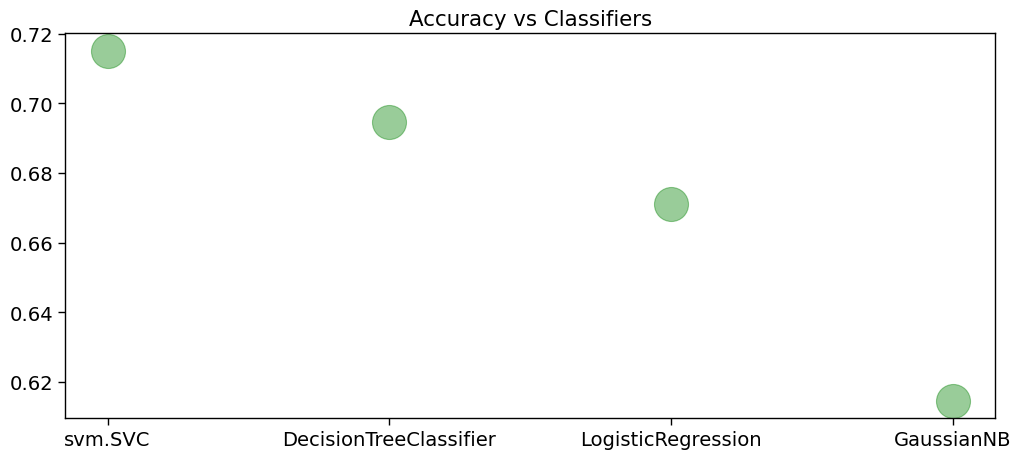

In [641]:
plt.figure(figsize=(12,5))
sns.set_context("paper", font_scale=1.6)
plt.scatter(classifiers, accuracies, s=600, c="green", alpha=0.4)
plt.title('Accuracy vs Classifiers')
plt.show()

In [645]:
## Prediction on entire dataset based on the KNeighborsClassifier model

preds = clf.predict(X)
df1['predicted_restaurant_category'] = preds

In [194]:
df1.columns

Index(['address', 'business_id', 'city', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'business_ratings', 'state', 'review_id',
       'user_id', 'text', 'checkins', 'cleaned_text', 'user_ratings',
       'polarity', 'csat', 'nps', 'tip_sentiment_score',
       'restaurant_category'],
      dtype='object')

In [244]:
# Perform sentiment analysis
df1['sentiment_score'] = df1['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the DataFrame
# print(df1.head())

# Display sentiment distribution
print("\
Sentiment Distribution:")
print(df1['sentiment_score'].describe())

# Categorize sentiments
df1['sentiment_category'] = pd.cut(df1['sentiment_score'], 
                                  bins=[-1, -0.1, 0.1, 1], 
                                  labels=['Negative', 'Neutral', 'Positive'])

print("\
Sentiment Categories:")
print(df1['sentiment_category'].value_counts(normalize=True))

Sentiment Distribution:
count    35839.000000
mean         0.053175
std          0.284387
min         -1.000000
25%         -0.116111
50%          0.050000
75%          0.240000
max          1.000000
Name: sentiment_score, dtype: float64
Sentiment Categories:
sentiment_category
Positive    0.430289
Neutral     0.302584
Negative    0.267126
Name: proportion, dtype: float64


In [197]:
df1.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,restaurant_category,sentiment_score,sentiment_category
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,-1.178322,3.5,TN,...,-0.706592,Undercook overpaid Got pizza wasnt even fully ...,3.25,0.62,0.0,0.0,0.0,Average,-0.020833,Neutral
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,-1.178322,3.5,TN,...,-0.706592,always great service year mess order wouldnt e...,3.25,0.62,0.0,0.0,0.0,Average,0.166667,Positive
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,-1.178322,3.5,TN,...,-0.706592,Dominoes getting better lately getting order p...,3.25,0.62,0.0,0.0,0.0,Average,0.242007,Positive
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,-1.178322,3.5,TN,...,-0.706592,Great pizza great service Love order online or...,3.25,0.62,0.0,0.0,0.0,Average,0.700000,Positive
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,-1.178322,3.5,TN,...,-0.706592,Ordered online quoted min delivered almost hou...,3.25,0.62,0.0,0.0,0.0,Average,0.078788,Neutral


In [200]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from collections import Counter
from tabulate import tabulate

# Ensure necessary NLTK data is downloaded
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)

def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNet"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def get_themes(text):
    words = nltk.word_tokenize(text.lower())
    themes = []
    for word in words:
        synsets = wordnet.synsets(word, pos=get_wordnet_pos(word))
        if synsets:
            themes.append(synsets[0].lemma_names()[0])
    return Counter(themes)

def analyze_brand(df, brand_name):
    # Filter for the specified brand locations
    brand_df = df[df['name'].str.contains(brand_name, case=False, na=False)]
    
    def analyze_group(group):
        themes = get_themes(' '.join(group['cleaned_text']))
        top_themes = themes.most_common(20)
        
        positive_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() > 0]
        negative_themes = [theme for theme, count in top_themes if group['sentiment_score'].mean() <= 0]
        
        return pd.Series({
            'address': group['address'].iloc[0],
            'postal_code': group['postal_code'].iloc[0],
            'business_ratings': round(group['business_ratings'].mean(), 2),
            'strengths': ', '.join(positive_themes[:3]),
            'areas_for_improvement': ', '.join(negative_themes[:3])
        })
    
    # Apply the analysis to each group
    brand_insights = brand_df.groupby('business_id').apply(analyze_group)
    
    # Reset index to make business_id a column
    brand_insights = brand_insights.reset_index()
    
    # Display the results in a tabular format
    print(tabulate(brand_insights, headers='keys', tablefmt='pipe', showindex=False))
    
    # Print summary statistics
    print(f"\
Total {brand_name} locations analyzed: {len(brand_insights)}")
    print(f"Average business rating: {brand_insights['business_ratings'].mean():.2f}")
    print(f"Highest rated location: {brand_insights.loc[brand_insights['business_ratings'].idxmax(), 'address']} (Rating: {brand_insights['business_ratings'].max()})")
    print(f"Lowest rated location: {brand_insights.loc[brand_insights['business_ratings'].idxmin(), 'address']} (Rating: {brand_insights['business_ratings'].min()})")
    
    # Aggregate strengths and areas for improvement
    all_strengths = ', '.join(brand_insights['strengths'].dropna())
    all_improvements = ', '.join(brand_insights['areas_for_improvement'].dropna())
    
    print("\
Common strengths across all locations:")
    print(', '.join(sorted(set(all_strengths.split(', ')))[:9]))  # Top 5 unique strengths
    
    print("\
Common areas for improvement across all locations:")
    print(', '.join(sorted(set(all_improvements.split(', ')))[:9]))  # Top 5 unique areas for improvement

print("Functions modified to be generic.")

Functions modified to be generic.


In [202]:
analyze_brand(df1,'Burger King')

| business_id            | address                        | postal_code   |   business_ratings | strengths                         | areas_for_improvement            |
|:-----------------------|:-------------------------------|:--------------|-------------------:|:----------------------------------|:---------------------------------|
| -s1TSRhuQXh0RQJhaFB1vA | 8515 W Fairview Ave            | 83704         |                3   | food, order, time                 |                                  |
| -v0JE4wW_4Xs6C3WT2XgDA | 2402 N Alvernon Way            | 85712         |                1.5 |                                   | food, order, Burger              |
| 0JX2lHSYOr18lwZqZ_BIWQ | 6590 Park Blvd                 | 33781         |                2.5 |                                   | Burger, get, travel              |
| 0lKyaC8N_QfP_h9AInljHQ | 2040 E Irvington Rd            | 85714         |                1.5 |                                   | Burger, order, king        

In [208]:
df['name'].unique()

array(["Domino's Pizza", 'Subway', "Wendy's", "McDonald's",
       "Papa John's Pizza", "Dunkin'", 'KFC', 'Starbucks', 'Wawa',
       '7-Eleven', 'ALDI', 'Burger King', 'Pizza Hut', "Arby's",
       'Taco Bell'], dtype=object)

In [ ]:
for name in df['name'].unique():
    analyze_brand(df1,name)

In [ ]:
distinct_brands = df1['name'].unique()

# Function to generate a random password
def generate_password(length=8):
    characters = string.ascii_letters + string.digits + string.punctuation
    return ''.join(random.choice(characters) for i in range(length))

# Create a dictionary to store usernames and passwords for each brand
credentials = {}

# Generate username and password for each brand
for brand in distinct_brands:
    username = brand.replace(" ", "_").lower()  # Replace spaces with underscores and convert to lowercase
    password = generate_password()
    credentials[brand] = {'username': username, 'password': password}


In [248]:
df1.head()

,address,business_id,city,latitude,longitude,name,postal_code,review_count,business_ratings,state,...,checkins,cleaned_text,user_ratings,polarity,csat,nps,tip_sentiment_score,restaurant_category,sentiment_score,sentiment_category
0,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,1.0,Undercook overpaid Got pizza wasnt even fully ...,3.25,0.62,0.0,0.0,0.0,Average,-0.020833,Neutral
1,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,1.0,always great service year mess order wouldnt e...,3.25,0.62,0.0,0.0,0.0,Average,0.166667,Positive
2,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,1.0,Dominoes getting better lately getting order p...,3.25,0.62,0.0,0.0,0.0,Average,0.242007,Positive
3,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,1.0,Great pizza great service Love order online or...,3.25,0.62,0.0,0.0,0.0,Average,0.700000,Positive
4,3001 Highway 31 W,sqSqqLy0sN8n2IZrAbzidQ,White House,36.464747,-86.659187,Domino's Pizza,37188,8,3.5,TN,...,1.0,Ordered online quoted min delivered almost hou...,3.25,0.62,0.0,0.0,0.0,Average,0.078788,Neutral


In [ ]:
from textblob import TextBlob

# Given words
words = ["service", "slow", "food", "amazing", "ambience", "great"]

# Step 1: Define a mapping of categories to descriptive words
category_descriptions = {
    "service": [],
    "food": [],
    "ambience": []
}

# Step 2: Associate descriptive words with categories
# This part assumes you have some logic or rule to map words to categories
# For simplicity, we'll use predefined mappings
category_keywords = {
    "service": ["slow", "poor", "good", "excellent"],
    "food": ["delicious", "amazing", "bad", "tasty"],
    "ambience": ["great", "pleasant", "bad", "cozy"]
}

# Populate the category descriptions
for word in words:
    for category, keywords in category_keywords.items():
        if word in keywords:
            category_descriptions[category].append(word)

# Step 3: Analyze Sentiment for Each Category
aspect_sentiments = {}
for category, descriptions in category_descriptions.items():
    combined_description = " ".join(descriptions)
    analysis = TextBlob(combined_description)
    sentiment = analysis.sentiment.polarity
    aspect_sentiments[category] = sentiment

# Step 4: Generate a Summary Report
def generate_report(aspect_sentiments):
    report = []
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment > 0:
            report.append(f"The {aspect} is positive with a sentiment score of {sentiment:.2f}.")
        elif sentiment < 0:
            report.append(f"The {aspect} needs improvement with a sentiment score of {sentiment:.2f}.")
        else:
            report.append(f"The {aspect} feedback is neutral.")
    return "\n".join(report)

# Generate and print the report
report = generate_report(aspect_sentiments)
print(report)

In [ ]:
from textblob import TextBlob

# List of words
words = ["service", "slow", "food", "amazing", "ambience", "great"]

# Analyzing sentiment for each word
insights = {}
for word in words:
    analysis = TextBlob(word)
    insights[word] = analysis.sentiment.polarity

# Grouping and generating a sentence
positive_words = [word for word in insights if insights[word] > 0]
negative_words = [word for word in insights if insights[word] < 0]

# Example of constructing an insight
if negative_words:
    insight = f"The {' and '.join(positive_words)} are great, but the {', '.join(negative_words)} need improvement."
else:
    insight = f"The {' and '.join(positive_words)} are excellent."

print(insight)